# Zhangll 1701110221

# 1. Stellar colors

Using the spectral template of sun-like g2v star from the stellar spectra library of Andrew Pickles, along with filter transmission curves of SLOAN filters, I calculated the B-V color of the g2v star as below shown:

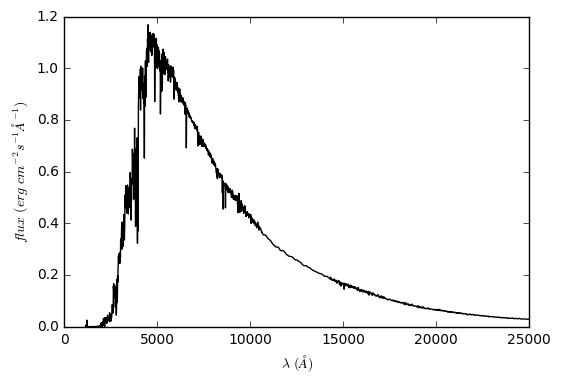

In [78]:
from astropy.io import fits
from astropy.io import ascii
import numpy as np
import matplotlib.pyplot as plt

data = ascii.read('dat/ukg2v.dat')

plt.plot(data['col1'],data['col2'],'k')  # erg cm^-2 sec^-1 Å^-1
plt.xlabel('$\\lambda\ (\\AA)$')
plt.ylabel('$flux\ (erg\ cm^{-2}s^{-1}\\AA^{-1})$')
plt.show()

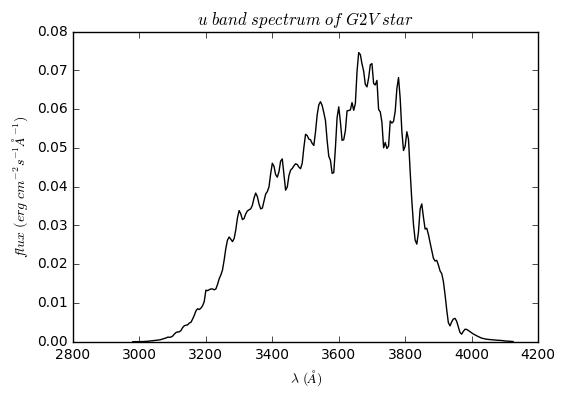

u  :-16.25


In [1]:
from astropy.io import fits
from astropy.io import ascii
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

data = ascii.read('dat/ukg2v.dat')
filt = ascii.read('filter/SLOAN-SDSS.u.dat')

#here to seleted the spectrum within the u band wavelength range
stl = filt[0][0]
edl = filt[-1][0]
stn = int((stl - data[0][0])/5)
edn = int((edl - data[0][0])/5)

#interpolate for the step of filter transmission curves of SLOAN filters is 25 Ångstroms
# while the step of spectral template is 5 Ångstroms.
lmd = np.arange(stl,edl,5)
f = interp1d(filt['col1'], filt['col2'], kind='cubic')
filllt = f(lmd)

# convolve the spectrum with the filter transmission curves
lllmd = data['col1'][stn:edn]
flux_lmd = data['col2'][stn:edn]*filllt

plt.plot(lllmd,flux_lmd,'k')
plt.xlabel('$\\lambda\ (\\AA)$')
plt.ylabel('$flux\ (erg\ cm^{-2}s^{-1}\\AA^{-1})$')
plt.title('$u\ band\ spectrum\ of\ G2V\ star$')
plt.show()

F = np.sum(flux_lmd*5)
F0 = 3*10**18*(1/stl - 1/edl)*3631*10**-23
col_u = -2.5*np.log10(F/F0)
print('u  :%.2f'%col_u)

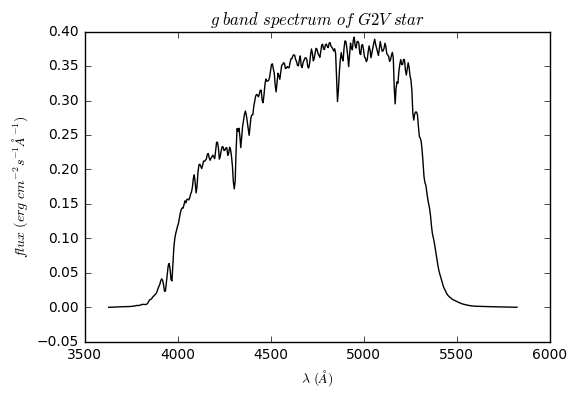

g  :-18.94


In [2]:
from astropy.io import fits
from astropy.io import ascii
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

data = ascii.read('dat/ukg2v.dat')
filt = ascii.read('filter/SLOAN-SDSS.g.dat')

stl = filt[0][0]
edl = filt[-1][0]
stn = int((stl - data[0][0])/5)
edn = int((edl - data[0][0])/5)

lmd = np.arange(stl,edl,5)
f = interp1d(filt['col1'], filt['col2'], kind='cubic')
filllt = f(lmd)

lllmd = data['col1'][stn:edn]
flux_lmd = data['col2'][stn:edn]*filllt

plt.plot(lllmd,flux_lmd,'k')
plt.xlabel('$\\lambda\ (\\AA)$')
plt.ylabel('$flux\ (erg\ cm^{-2}s^{-1}\\AA^{-1})$')
plt.title('$g\ band\ spectrum\ of\ G2V\ star$')
plt.show()

F = np.sum(flux_lmd*5)
F0 = 3*10**18*(1/stl - 1/edl)*3631*10**-23
col_g = -2.5*np.log10(F/F0)
print('g  :%.2f'%col_g)

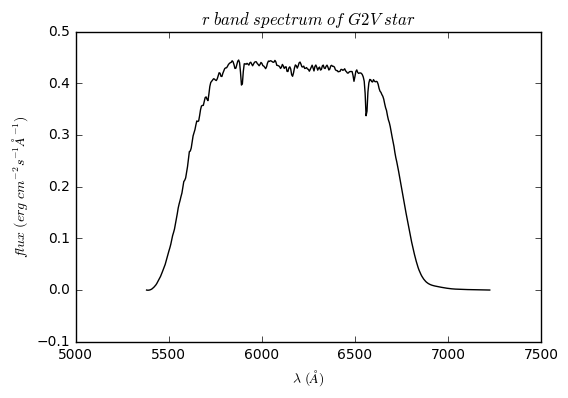

r  :-19.95


In [3]:
from astropy.io import fits
from astropy.io import ascii
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

data = ascii.read('dat/ukg2v.dat')
filt = ascii.read('filter/SLOAN-SDSS.r.dat')

stl = filt[0][0]
edl = filt[-1][0]
stn = int((stl - data[0][0])/5)
edn = int((edl - data[0][0])/5)

lmd = np.arange(stl,edl,5)
f = interp1d(filt['col1'], filt['col2'], kind='cubic')
filllt = f(lmd)

lllmd = data['col1'][stn:edn]
flux_lmd = data['col2'][stn:edn]*filllt

plt.plot(lllmd,flux_lmd,'k')
plt.xlabel('$\\lambda\ (\\AA)$')
plt.ylabel('$flux\ (erg\ cm^{-2}s^{-1}\\AA^{-1})$')
plt.title('$r\ band\ spectrum\ of\ G2V\ star$')
plt.show()

F = np.sum(flux_lmd*5)
F0 = 3*10**18*(1/stl - 1/edl)*3631*10**-23
col_r = -2.5*np.log10(F/F0)
print('r  :%.2f'%col_r)

In [5]:
print('u-g  :%.2f   g-r  :%.2f'%(col_u - col_g, col_g - col_r))
B_V = 0.90*(col_g - col_r) + 0.21
print('B-V  :%.2f'%B_V)

u-g  :2.69   g-r  :1.01
B-V  :1.12


For the calculated result by has been provided by Pickles 1998, I just download the data from VizieR

(http://vizier.cfa.harvard.edu/viz-bin/VizieR?-source=J/PASP/110/863) and make my analysis with the 

question requirement as below.

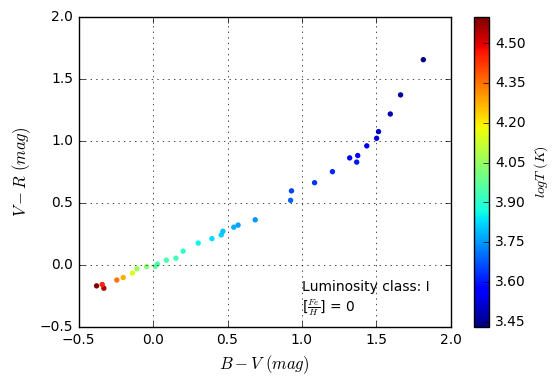

In [6]:
from astropy.io import ascii
import numpy as np
import matplotlib.pyplot as plt

data = ascii.read('stellar_color.dat')
mask1 = np.array(list(map(lambda x: (x[-1]=='V')and(x[-2]!='I'), data['SpType'])))
mask2 = data['[Fe/H]'] == 0.0
mask = mask1*mask2
dat_con_g_Z = data[mask]

fig, ax = plt.subplots()
color = dat_con_g_Z['LogTe']
mapp = ax.scatter(dat_con_g_Z['B3-V'],dat_con_g_Z['V-Rc'],c=color,s=15,edgecolors='none')

cbar = fig.colorbar(mapp)
cbar.ax.set_ylabel('$logT\ (K)$')
plt.text(1.0,-0.4,'Luminosity class: I\n[$\\frac{Fe}{H}$] = 0')
ax.grid(True)
ax.set_xlabel('$B-V\ (mag)$',fontsize = 12)
ax.set_ylabel('$V-R\ (mag)$',fontsize = 12)
#plt.gca().invert_xaxis()
plt.show()

From above result, we can find that, give the constant gravity and solar metallicity,

the color index increase as the temperature decrease(the colorbar becomes bluer), 

which is coincident with feature we can find from a H-R diadram.

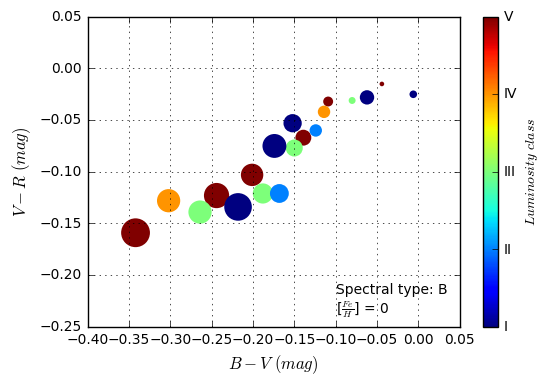

In [10]:
from astropy.io import ascii
import numpy as np
import matplotlib.pyplot as plt


data = ascii.read('stellar_color.dat')
mask1 = np.array(list(map(lambda x: x[0]=='B', data['SpType'])))
mask2 = data['[Fe/H]'] == 0.0
mask = mask1*mask2
dat_con_g_Z = data[mask]

g1 = np.array(list(map(lambda x:  ((x[-1]=='I')and(x[-2]!='I'))*1, dat_con_g_Z['SpType'])))
g2 = np.array(list(map(lambda x:  ((x[-2:]=='II')and(x[-3]!='I'))*2, dat_con_g_Z['SpType'])))
g3 = np.array(list(map(lambda x:  (x[-3:]=='III')*3, dat_con_g_Z['SpType'])))
g4 = np.array(list(map(lambda x:  (x[-2:]=='IV')*4, dat_con_g_Z['SpType'])))
g5 = np.array(list(map(lambda x:  ((x[-1]=='V')and(x[-2]!='I'))*5, dat_con_g_Z['SpType'])))
grav = g1+g2+g3+g4+g5

#coe = np.polyfit(dat_con_g_Z['B3-V'],dat_con_g_Z['V-Rc'],1)
#func = np.poly1d(coe)
#xx = np.arange(0.1,-0.41,0.05)
#yy = func(xx)

#plt.plot(xx,yy,'k--',label='1D fitting')
fig, ax = plt.subplots()
color = grav
size = (dat_con_g_Z['LogTe']-np.min(dat_con_g_Z['LogTe'])+0.001)%1//0.001+10
mapp = ax.scatter(dat_con_g_Z['B3-V'],dat_con_g_Z['V-Rc'],c=color,s=size,edgecolors='none')

cbar = fig.colorbar(mapp)
loc = np.arange(1, 6, 1)
cbar.set_ticks(loc)
labels = ['I','II','III','IV','V']
cbar.set_ticklabels(labels)
cbar.ax.set_ylabel('$Luminosity\ class$')
plt.text(-0.1,-0.24,'Spectral type: B\n[$\\frac{Fe}{H}$] = 0')
#cbar.ax.get_yticklabels([1,2,3,4,5],['I','II','III','IV','V'])
ax.grid(True)
ax.set_xlabel('$B-V\ (mag)$',fontsize = 12)
ax.set_ylabel('$V-R\ (mag)$',fontsize = 12)
#plt.gca().invert_xaxis()
plt.show()

In above figure, the different colors mean different luminosious classes which

represent the difference in gravity at a constant temperature and metallicity. 

And the spectral type gives a temperature range while the same area of the spot 

shows more accurately the same temperature.

With the same temperature and metallicity, with lager color index the gravity 

looks to be reduced. 

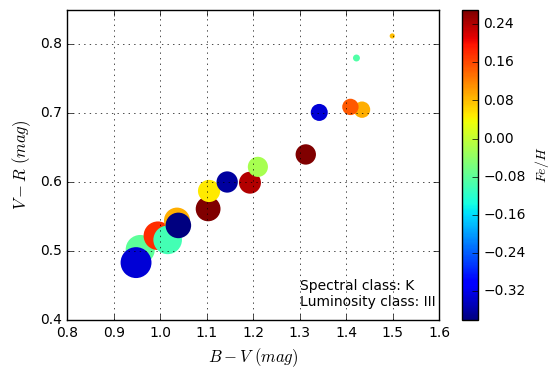

In [11]:
from astropy.io import ascii
import numpy as np
import matplotlib.pyplot as plt

data = ascii.read('stellar_color.dat')
mask1 = np.array(list(map(lambda x: ((x[-3:]=='III')), data['SpType'])))
mask2 = np.array(list(map(lambda x: ((x[0]=='K')or(x[1]=='K')), data['SpType'])))
mask = mask1*mask2
dat_con_g_Z = data[mask]

#coe = np.polyfit(dat_con_g_Z['[Fe/H]'],dat_con_g_Z['B3-V'],1)
#func = np.poly1d(coe)
#xx = np.arange(-0.5,0.6,0.1)
#yy = func(xx)

#plt.plot(xx,yy,'k--',label='1D fitting')
fig, ax = plt.subplots()
color = dat_con_g_Z['[Fe/H]']
size = (dat_con_g_Z['LogTe']-np.min(dat_con_g_Z['LogTe'])+0.001)%1//0.0002+10
mapp = ax.scatter(dat_con_g_Z['B3-V'],dat_con_g_Z['V-Rc'],c=color,s=size,edgecolors='none')

cbar = fig.colorbar(mapp)
cbar.ax.set_ylabel('$Fe/H$')
plt.text(1.3,0.42,'Spectral class: K\nLuminosity class: III')
ax.grid(True)
ax.set_xlabel('$B-V\ (mag)$',fontsize = 12)
ax.set_ylabel('$V-R\ (mag)$',fontsize = 12)
#plt.gca().invert_xaxis()
plt.show()

In above figure, the different colors mean different metallicity at a constant 

temperature and gravity. And aslo the same area of the spot shows more 

accurately the same temperature.

With the same temperature and gravity, the star with redder color looks to 

have high metallicity.

# 2. Stellar lifetimes and galaxy colors

With $L \propto \frac{1}{\kappa}\mu^{4}M^{3}$

The lifetime of the Sun is $\sim$ 10 billion years. Because the luminosity of main sequence stars of $10M_{\odot}$ is 

about a thousand times of the sun, so it has a lifetime $\sim$ 100 million years. While for the main sequence

stars with $0.1M_{\odot}$ have roughly one thousandth of the solar luminosity, and its lifetime is about a trillion 

years. https://en.wikipedia.org/wiki/Main_sequence


As discuused in above question, with the metal abundance increasing, the stellar color index would be 

larger and larger. So as the stellar population evolve, its metallicity increases as well, then the overall

color of the galaxy would turn redder. According to the stellar population theory, the stars of low metal

abundance tend to form early and have greater mass, so it is easier to evolve. In other words, the low- 

metallicitye stellar population, would turn red much quickly. However, due to low overall metallicity, the 

overall level of redness would be lower as well.

# 3. UV colors of stars

From the plot of histograms at each spectral type of FUV-NUV color, I find two main trends.

One is that on the top part of the plot, the distribution of the stars move toward right as the

the spectral type changes from B type to G type. Another obvious trend is that there begin 

to shows a peak of uv light excess when the stars become F and M type as shown in the 

bottom of the plot, and the transition happens gradually.

To describe visually the trends, for the FUV-NUV color represent the temperature and as we 

discussed above, a higher temperature means a much bluer color of a star, so that the first

trend should be a natural result of the decrease of the effective temperature of the stars of

different spectral types. But for the second trends, it is out of my expectation. However, refer

to some study, there is a high percentage of giants to dwarfs levels for G stars and among 

K and early M stars(Batalha et al. 2010, Mann et al. 2012). and the second trend in the plot 

might be originate from various types of hot stars, including white dwarf DA and sdB stars,

binaries, and strong chromosphere stars that are young or in active binaries(Smith et al.2014).

And they find that the active chromospheres may be a better explanation.

# 4. HR diagram

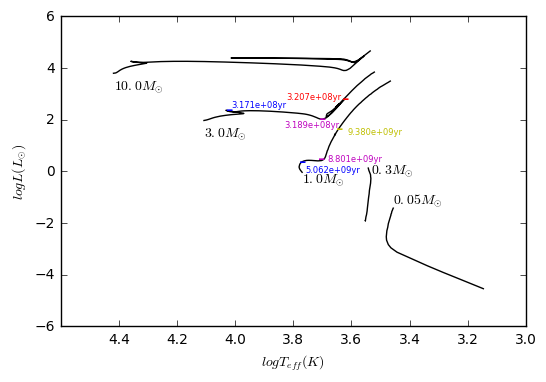

In [113]:
from astropy.io import ascii
import matplotlib.pyplot as plt
import numpy as np


data_0_05 = ascii.read('trace/z019y28_0.05_alp1.2.dat')
data_0_3 = ascii.read('trace/z019y28_0.3_alp1.2.dat')
data_1 = ascii.read('trace/z017y30_1.dat')
data_3 = ascii.read('trace/z017y30_3.dat')
data_10 = ascii.read('trace/z017y30_10.dat')

plt.plot(data_0_05['logTe'],data_0_05['logL/Lsun'],'k')
plt.plot(data_0_3['logTe'],data_0_3['logL/Lsun'],'k')
plt.plot(data_1['logTef'],data_1['logL'],'k')
plt.plot(data_3['logTef'],data_3['logL'],'k')
plt.plot(data_10['logTef'],data_10['logL'],'k')

plt.text(data_0_05['logTe'][0],data_0_05['logL/Lsun'][0]+0.2,'$0.05M_{\\odot}$')
plt.text(data_0_3['logTe'][0]-0.01,data_0_3['logL/Lsun'][0]-0.2,'$0.3M_{\\odot}$')
plt.text(data_1['logTef'][0],data_1['logL'][0]-0.4,'$1.0M_{\\odot}$')
plt.text(data_3['logTef'][0],data_3['logL'][0]-0.6,'$3.0M_{\\odot}$')
plt.text(data_10['logTef'][0],data_10['logL'][0]-0.6,'$10.0M_{\\odot}$')

plt.text(data_1['logTef'][5],data_1['logL'][5],s='-',color='b',fontsize=15)
plt.text(data_1['logTef'][5]-0.02,data_1['logL'][5]-0.2,s='%.3e'%(data_1['age/yr'][6])+'yr',color='b',fontsize=6)
plt.text(data_1['logTef'][18],data_1['logL'][18]-0.15,s='-',color='m',fontsize=15)
plt.text(data_1['logTef'][18]-0.03,data_1['logL'][18],s='%.3e'%(data_1['age/yr'][18])+'yr',color='m',fontsize=6)
plt.text(data_1['logTef'][46],data_1['logL'][46],s='-',color='y',fontsize=15)
plt.text(data_1['logTef'][46]-0.04,data_1['logL'][46],s='%.3e'%(data_1['age/yr'][46])+'yr',color='y',fontsize=6)
plt.text(data_3['logTef'][23],data_3['logL'][23]-0.2,s='-',color='b',fontsize=15)
plt.text(data_3['logTef'][23]-0.02,data_3['logL'][23]+0.1,s='%.3e'%(data_3['age/yr'][23])+'yr',color='b',fontsize=6)
plt.text(data_3['logTef'][60]+0.01,data_3['logL'][60]-0.2,s='-',color='m',fontsize=15)
plt.text(data_3['logTef'][60]+0.13,data_3['logL'][60]-0.3,s='%.3e'%(data_3['age/yr'][60])+'yr',color='m',fontsize=6)
plt.text(data_3['logTef'][81]+0.01,data_3['logL'][81]-0.2,s='-',color='r',fontsize=15)
plt.text(data_3['logTef'][81]+0.2,data_3['logL'][81],s='%.3e'%(data_3['age/yr'][81])+'yr',color='r',fontsize=6)

plt.gca().invert_xaxis()
plt.xlabel('$logT_{eff} (K)$')
plt.ylabel('$logL (L_{\\odot})$')

plt.show()

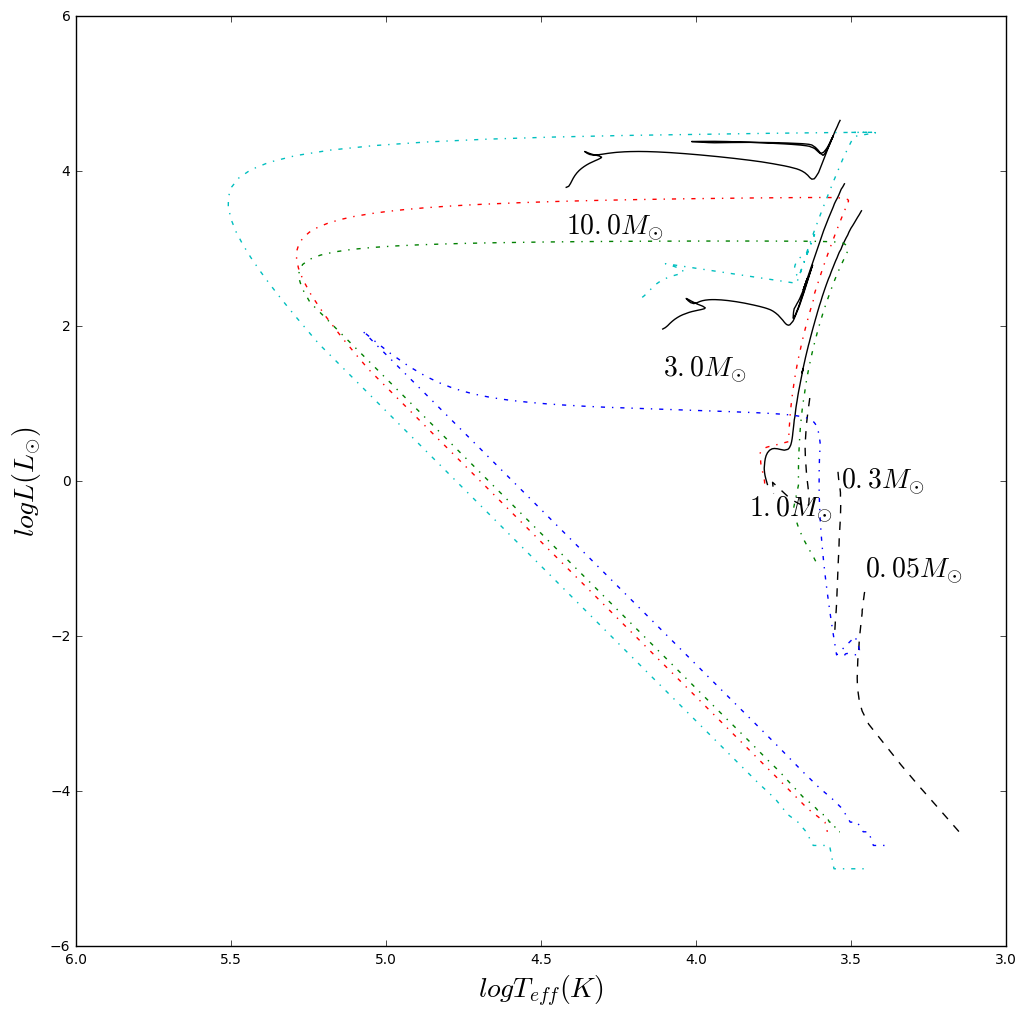

In [43]:
from astropy.io import ascii
import matplotlib.pyplot as plt
import numpy as np


data_0_05 = ascii.read('trace/z019y28_0.05_alp1.2.dat')
data_0_3 = ascii.read('trace/z019y28_0.3_alp1.2.dat')
data_1 = ascii.read('trace/z017y30_1.dat')
data_1agb = ascii.read('trace/z017y30_1agb.dat')
data_1hb = ascii.read('trace/z017y30_1hb.dat')
data_1_1 = ascii.read('trace/z019y28_1.0_alp1.2.dat')
data_3 = ascii.read('trace/z017y30_3.dat')
data_10 = ascii.read('trace/z017y30_10.dat')

data_02_lco = ascii.read('trace/0.2masssun.dat')
data_065_lco = ascii.read('trace/0.65masssun.dat')
data_1_lco = ascii.read('trace/1masssun.dat')
data_2_lco = ascii.read('trace/2masssun.dat')
data_4_lco = ascii.read('trace/4masssun.dat')
data_10_lco = ascii.read('trace/10masssun.dat')

plt.figure(figsize=[12,12])
plt.plot(data_0_05['logTe'],data_0_05['logL/Lsun'],'k--')
plt.plot(data_0_3['logTe'],data_0_3['logL/Lsun'],'k--')
plt.plot(data_1['logTef'],data_1['logL'],'k')
#plt.plot(data_1agb['logTef'],data_1agb['logL'],'k--')
#plt.plot(data_1hb['logTef'],data_1hb['logL'],'k-.')
plt.plot(data_1_1['logTe'],data_1_1['logL/Lsun'],'k--')
plt.plot(data_3['logTef'],data_3['logL'],'k')
plt.plot(data_10['logTef'],data_10['logL'],'k')

plt.plot(np.log10(data_02_lco['T']),np.log10(data_02_lco['L']),'-.')
plt.plot(np.log10(data_065_lco['T']),np.log10(data_065_lco['L']),'-.')
plt.plot(np.log10(data_1_lco['T']),np.log10(data_1_lco['L']),'-.')
#plt.plot(np.log10(data_2_lco['T']),np.log10(data_2_lco['L']),'-.')
plt.plot(np.log10(data_4_lco['T']),np.log10(data_4_lco['L']),'-.')
#plt.plot(np.log10(data_10_lco['T']),np.log10(data_10_lco['L']),'m-.')

plt.text(data_0_05['logTe'][0],data_0_05['logL/Lsun'][0]+0.2,'$0.05M_{\\odot}$',fontsize=20)
plt.text(data_0_3['logTe'][0]-0.01,data_0_3['logL/Lsun'][0]-0.2,'$0.3M_{\\odot}$',fontsize=20)
plt.text(data_1['logTef'][0]+0.06,data_1['logL'][0]-0.4,'$1.0M_{\\odot}$',fontsize=20)
plt.text(data_3['logTef'][0],data_3['logL'][0]-0.6,'$3.0M_{\\odot}$',fontsize=20)
plt.text(data_10['logTef'][0],data_10['logL'][0]-0.6,'$10.0M_{\\odot}$',fontsize=20)

plt.gca().invert_xaxis()
plt.xlabel('$logT_{eff} (K)$',fontsize=20)
plt.ylabel('$logL (L_{\\odot})$',fontsize=20)

plt.show()

References:

(Bertelli, G. et al.2009)

(D’Antona & Mazzitelli 1994)

(Icko Iben, Jr. 1965)

# 5. Habitability

As life on Earth depends on water and atmosphere, there should be enough atmosphere 

to protect against external radiation and for biological metabolism, and the atmospheric 

temperature of  habitable planet should roughly within 270-320K(here consider too high

tempereture would be adverse for life evolution).


For star with five times the mass of the sun, the effective temperature of about $10^{4}K$. 

Mark that the radius of the star and the planet as R and r, and the distance between 

them is D.

within the habitable zone

$\frac{4\pi R^{2}\sigma T^{4}_{S}}{4\pi D^{2}}\times\pi r^{2} \sim 4\pi r^{2}\sigma T^{4}_{P}$

=>$D \sim 2\frac{RT^{2}_{S}}{T_{P}^{2}}$

give $T_{S} \sim 10^{4}K$ and $T_{P}$ within 270K~320K

=> the range of D is roughly $6.3\times10^{5}R \sim 7.4\times10^{5}R$

for a 0.1 $ M_{\odot}$ star, the effective temperature and radius of it is much lower, so the distance from the star 

that a planet would be habitable would be much small. 


For higher-mass stars ($M \gtrsim 1 M_{\odot}$), evolve towards lower $T_{eff}$ but strongly increase in radius, so the 

habitable range of the $5M_{\odot}$ star would move outward. 

While for low-mass stars ($M \lesssim 1 M_{\odot}$) evolve towards higher $T_{eff}$, and their radius increase is modest, 

the habitable range of the $0.1M_{\odot}$ star would move inward.

# 4. Conceptual questions, I

## (a)

As the effective temperature of a star decreases the convective envelope gets deeper,if $T_{eff}$ is 

small enough stars can therefore become completely convective. Within such condition, the str-

ucture of the star would be adiabatic, that the temperature stratification $\nabla = \frac{dlogT}{dlogP}$ equals $\nabla_{ad}$.

In this case, nearly arbitrarily high energy flux can be carried by the temperature gradient, that 

the luminosity of a fully convective star is practically independent of its structure. 

And it can be derived that, with above condition and some reasonble assumptions, there is a 

relation between luminosity and effective tepereture and stellar mass as: 

$\qquad logT_{eff} = AlogL + B logM +C$. 

So for stars of given mass there is a whole range of possible luminosity with little difference

of the effective temperature.



## (b)

The region to the right of the HL in the HRD is a forbidden region for stars in hydrostatic 

equilibrium. We can get after analysis that in the neighbourhood of the Hayashi line, the 

condition $\nabla = \frac{dlogT}{dlogP}$ equals $\nabla{ad}$ no longer be satisfied, and in the right region of the HL, 

the $\bar{\nabla} > \nabla_{ad}$. With a significantly positive $\bar{\nabla} - \nabla_{ad}$ means a significant part of the star 

must have a superadiabatic temperature gradient that will give rise to a very large conv-

ective energy flux. As a result, the large energy flux very rapidly transports heat outwards, 

and decreases the temperature gradient in the superadiabatic region until $\bar{\nabla} = \nabla_{ad}$ again 

and the star will quickly back to the Hayashi line.

## (c)

For stars on the zero-age main sequence are (nearly) homogeneous in composition and are 

in completely hydrostatic and thermal equilibrium, then with the homology relations we could

expect ZAMS to follow a mass-luminosity as $L \propto \frac{1}{\kappa}\mu^{4}M^{3}$ as the formula 7.32 in Onno Pols

book and as we discussed in privious homework.

## (d)

First is the stellar mass, the mass of the star, as discussed above,determines star's initial position 

on the HR diagram. Then is the metallicity, which determines the evolution track of the star with its 

effect on $\mu$.

# 5. Conceptual questions, II

## (a)

As shown above that $L \propto \mu^{4}M^{3}$, with the evolution of the star by burning hydrogen into helium, 

therefore the increasing mean molecular weight μ would leads to the increasing luminosity.

Consider the pressure that the outer layers exert on the core that:

$\qquad P_{nev} = \int_{m_{c}}^{M}\frac{Gm}{4\pi r^{4}}dm$

and with ideal gas law impling that $\frac{P_{c}}{\rho_{c}} \propto \frac{T_{c}}{\mu}$

As the $\mu_{c}$ increases, and the roughly constant $T_{c}$ and $\rho_{c}$, will lead to a decreased $P_{c}$,

and then the outer layers would expand to keep the star in HE.

For low mass stars, the central temperature is too low for the CNO cycle and the main 

energyproducing reactions are those of the pp chain, which have a larger increase of 

$T_{c}$ and $\rho_{c}$ than the case for the CNO cycle as for high mass stars. Therefore the outer 

layers of low mass stars need to expand less in order to maintain hydrostatic equilibrium 

in the core.

## (b)

As a consequence of the temperature sensitivity the CNO cycle, for massive stars there is a large concentration

of $\epsilon_{nuc}$ towards the centre. This gives rise to a large central $\nabla_{ad}$ and hence to a convective cores.

Towards the end of the main sequence phase, the thermostatic action of the CNO reactions diminishes so $Tc$ of

massive stars has to increase substantially to maintain the energy production.When hydrogen is finally exhausted, 

the stars will lose more energy at its surface than that produced in the centre, it gets out of thermal equilibrium and 

it will undergo an overall contraction. 

When the core has contracted and heated up sufficiently that at the edge of the former convective core the tempera-

ture is high enough for the CNO cycle to ignite again in a shell around the helium core then the hook feature appears.

As for sun-like low mass stars, the lower T-sensitivity of the pp chains means that low-mass stars have radiative cores, 

and hydrogen is depleted gradually in the core and there is a smooth transition to hydrogen-shell burning.Then the 

evolution tracks for low-mass stars therefore do not show a hook feature.

## (c)

According to the Schwarzschild criterion in a chemically homogeneous layer the boundary of convective zone 

is located at the surface where $\nabla_{rad} = \nabla_{ad}$. At this point the acceleration due to the buoyancy force, that

$a \approx g\nabla_{rad} = \nabla_{ad}$ vanishes. Outside this boundary, the acceleration changes sign and a convective bubble 

will be strongly braked. However, the convective eddies have (on average) a non-zero velocity when they cross 

the Schwarzschild boundary, and will overshoot by some distance due to their inertia. People call this phenomena

as convective overshooting.

effects of overshooting on the evolution of a star:

1.a longer main-sequence lifetime, because of the larger hydrogen reservoir available;

2.a larger increase in luminosity and radius during the main sequence, because of the 

larger region inside which $\mu$ increases which enhances the effects on L and R discussed

earlier in this section;

3.the hydrogen-exhausted core mass is larger at the end of the main sequence, which 

in turn leads to larger luminosities during all evolution phases after the main sequence 

and, as a result, shorter lifetimes of these post-main sequence phases.

## (d)

After the end of main sequence of star evolution, there is a rapid transition from hydrogen

burning in the centre to hydrogen burning in a shell and the thermal timescale of the shell

burning is relatively short as $\sim 10^{6} yr$. The rapid evolution on a thermal timescale 

across the H-R diagram from the end of the main sequence to $T_{eff} \approx 5000K$ is characteristic

of stars massive than the Sun. The probability of detecting stars during this short-lived phase 

is very small, resulting in a gap in the distribution of stars in the H-R diagram known as the 

Hertzsprung gap

## (e) 

morrior priciple means that whenever a star has an active shell-burning source, the burning shell 

acts as a mirror between the core and the envelope as the core contraction leads to the envelope

expansion and the core expansion results in the envelope contraction.

## (f)

As the shell buring, the envelope temperature decreases and the opacity in the envelope rises,

impeding radiative energy transport. So the envelope grows increasingly unstable to convection 

starting from the surface. Then after the shell buring process, star become a red gaint with a 

deep convective envelope. 

With a deep convective envelope, the star is then located close to the Hayashi line in the H-R 

diagram. and while it continues to expand in response to core contraction,the luminosity increases

as the effective temperature remains at the approximately constant value corresponding to the HL.

# 6. Mass loss of massive stars during the main sequence

## (a)

with $log(\frac{L}{L_{\odot}}) \approx 0.781 + 2.760\times log(\frac{M_{i}}{M_{\odot}})$

$log \dot{M} \approx -12.76 + 1.3\times log(\frac{L}{L_{\odot}})$

and $log\tau_{MS} \approx 7.719 -0.655\times log(\frac{M_{i}}{M_{\odot}})$

In [6]:
import numpy as np

#L_sun = 3.8*10**33  # erg s^-1
#M_sun = 2*10**33    # g
M = np.array([25,40,60,85,120])

L = 10**(0.781+2.760*np.log10(M))
log_dot_M = -12.76 + 1.3*np.log10(L)  # M_sun yr^-1
log_tau_MS = 7.719 - 0.655*np.log10(M)  # yr

M_lost = 10**(log_dot_M + log_tau_MS)
frac = M_lost/M
print(10**log_dot_M)
print(10**log_tau_MS)
print(M_lost)
print(frac)

[  1.86684711e-07   1.00807130e-06   4.31823911e-06   1.50679824e-05
   5.19280855e-05]
[ 6358421.21288326  4673591.02557868  3583529.06283841  2852532.5161224
  2275811.48006026]
[   1.18702002    4.71131296   15.47453535   42.98190987  118.17853302]
[ 0.0474808   0.11778282  0.25790892  0.50566953  0.98482111]


give $M_{i} = $ 25,40,60,85 and 120 $M_{\odot}$

we can get the the farction of mass that is lost respectively is:

0.0475,  0.1178,  0.258,  0.5057 and  0.9848.

## (b) 

In [9]:
import numpy as np

#L_sun = 3.8*10**33  # erg s^-1
#M_sun = 2*10**33    # g
M = 85
M_lost = 0.17*M

L = 10**(0.781+2.760*np.log10(M))
log_dot_M = -12.76 + 1.3*np.log10(L)  # M_sun yr^-1

t_loss = M_lost/(10**log_dot_M)
print('%.3e'%t_loss)

9.590e+05


Within in the convective region, the products of nuclear burning will sufficiently mix

with each other during a short time, but until the radiative shell is gone these product

would appear at the surface.

So for the star with an initial mass of 85 $M_{\odot}$ on the ZAMS and a convective core that

contains 83 % of the mass, the time at which products of nuclear burning will appear 

at the surface equals  $(1-0.83)M_{\odot}/\dot{M}$ is roughly $9.590e+05$ yr.

## (c)

According to the nuclear burning theory, in the core of a star, Hydrogrn burn firstly 

through CNO circle for massive star, then is the $3\alpha$ reaction of Helium, and the

carbon later. from the surface to the inside of a sufficiently evolved star, there are 

H, He, C & N & O, Ne & Mg, Si & S, Fe in sequence. And for the mass loss of a star 

bigins from the outside of it.

So in the chronological order, there shoule be WNL firstly created with a little loss

of the hydrogen. Then is the WNE with loss of the whole hydrogen layer, and finally 

is the WC with loss of the layer of hydrogen burning and expose the helium burning 

region.